In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("C:\\Users\\user\\Desktop\\data sets\\iris.csv")

In [4]:
df = df.iloc[:,1:]

In [5]:
df.head()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df["Species"] = lb.fit_transform(df['Species'])

In [7]:
df.head()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
df = df[df['Species']!=0][['Sepal Width (cm)','Petal Length (cm)','Species']]

In [9]:
df.head()

,Sepal Width (cm),Petal Length (cm),Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

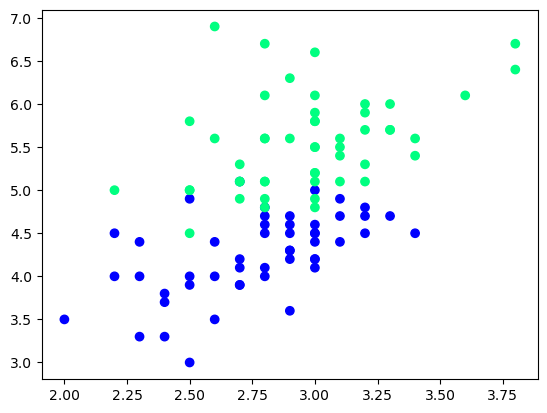

In [11]:
plt.scatter(x=df['Sepal Width (cm)'],y=df['Petal Length (cm)'],c=df['Species'],cmap='winter')

In [12]:
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test =df.iloc[80:,:].sample(5)

In [14]:
df_train

,Sepal Width (cm),Petal Length (cm),Species
113,2.5,5.0,2
50,3.2,4.7,1
71,2.8,4.0,1
65,3.1,4.4,1
96,2.9,4.2,1
51,3.2,4.5,1
73,2.8,4.7,1
99,2.8,4.1,1
98,2.5,3.0,1
63,2.9,4.7,1


In [15]:
df_val

,Sepal Width (cm),Petal Length (cm),Species
77,3.0,5.0,1
118,2.6,6.9,2
108,2.5,5.8,2
100,3.3,6.0,2
115,3.2,5.3,2


In [16]:
df_test

,Sepal Width (cm),Petal Length (cm),Species
56,3.3,4.7,1
52,3.1,4.9,1
97,2.9,4.3,1
66,3.0,4.5,1
76,2.8,4.8,1


In [17]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [19]:
X_test

array([[3. , 5. ],
       [2.6, 6.9],
       [2.5, 5.8],
       [3.3, 6. ],
       [3.2, 5.3]])

# Case 1 - Bagging

In [30]:
# Data for tree 1
df_bag = df_train.sample(8,replace = True) # replace means can have repated row

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]
# X = df.bag

In [31]:
df_bag

,Sepal Width (cm),Petal Length (cm),Species
63,2.9,4.7,1
73,2.8,4.7,1
73,2.8,4.7,1
71,2.8,4.0,1
71,2.8,4.0,1
73,2.8,4.7,1
96,2.9,4.2,1
113,2.5,5.0,2


In [32]:
X

,Sepal Width (cm),Petal Length (cm)
63,2.9,4.7
73,2.8,4.7
73,2.8,4.7
71,2.8,4.0
71,2.8,4.0
73,2.8,4.7
96,2.9,4.2
113,2.5,5.0


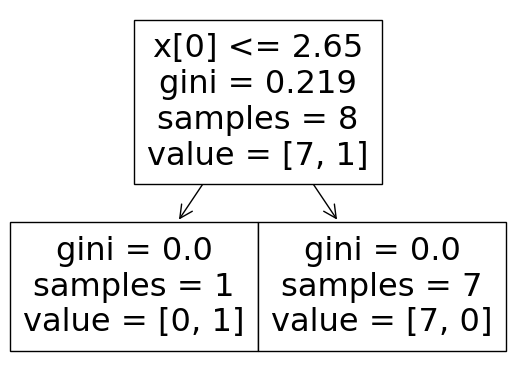

0.6


C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
# from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score
dt_bag1 = DecisionTreeClassifier()
evaluate(dt_bag1,X,y)

In [38]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
#     plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

In [44]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,Sepal Width (cm),Petal Length (cm),Species
71,2.8,4.0,1
98,2.5,3.0,1
71,2.8,4.0,1
51,3.2,4.5,1
50,3.2,4.7,1
71,2.8,4.0,1
113,2.5,5.0,2
96,2.9,4.2,1


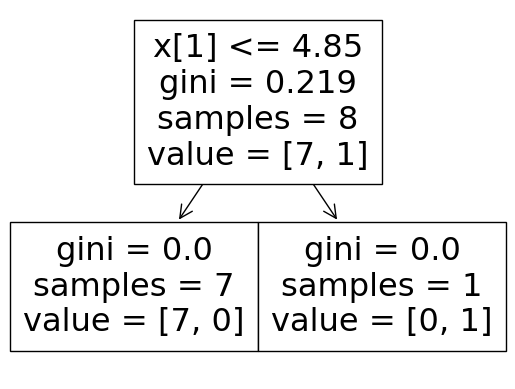

0.8


C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [45]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [46]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,Sepal Width (cm),Petal Length (cm),Species
73,2.8,4.7,1
96,2.9,4.2,1
96,2.9,4.2,1
96,2.9,4.2,1
98,2.5,3.0,1
71,2.8,4.0,1
71,2.8,4.0,1
63,2.9,4.7,1


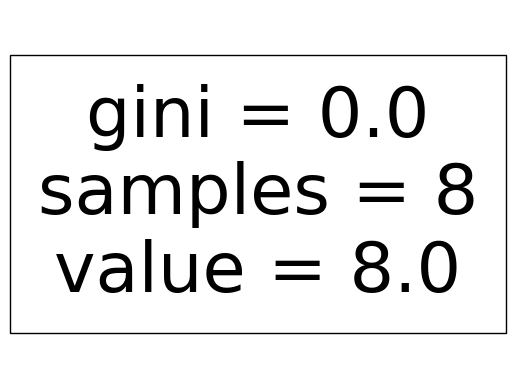

0.2


C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [47]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

# Predict

In [40]:
df_test

,Sepal Width (cm),Petal Length (cm),Species
56,3.3,4.7,1
52,3.1,4.9,1
97,2.9,4.3,1
66,3.0,4.5,1
76,2.8,4.8,1


In [48]:
print("Predictor 1",dt_bag1.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.2,5.0]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [2]
Predictor 3 [1]


C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Pasting

In [50]:
# Row sampling without replacement
df_train

,Sepal Width (cm),Petal Length (cm),Species
113,2.5,5.0,2
50,3.2,4.7,1
71,2.8,4.0,1
65,3.1,4.4,1
96,2.9,4.2,1
51,3.2,4.5,1
73,2.8,4.7,1
99,2.8,4.1,1
98,2.5,3.0,1
63,2.9,4.7,1


In [51]:
df_train.sample(8)

,Sepal Width (cm),Petal Length (cm),Species
63,2.9,4.7,1
96,2.9,4.2,1
50,3.2,4.7,1
71,2.8,4.0,1
65,3.1,4.4,1
51,3.2,4.5,1
113,2.5,5.0,2
73,2.8,4.7,1


# Random Subspaces

In [53]:
df = df.sample(10)
df

,Sepal Width (cm),Petal Length (cm),Species
81,2.4,3.7,1
80,2.4,3.8,1
130,2.8,6.1,2
98,2.5,3.0,1
52,3.1,4.9,1
76,2.8,4.8,1
62,2.2,4.0,1
79,2.6,3.5,1
119,2.2,5.0,2
65,3.1,4.4,1


In [55]:
df.sample(2,replace=True,axis =1)

,Sepal Width (cm),Sepal Width (cm)
81,2.4,2.4
80,2.4,2.4
130,2.8,2.8
98,2.5,2.5
52,3.1,3.1
76,2.8,2.8
62,2.2,2.2
79,2.6,2.6
119,2.2,2.2
65,3.1,3.1


# Random Patches

In [56]:
df

,Sepal Width (cm),Petal Length (cm),Species
81,2.4,3.7,1
80,2.4,3.8,1
130,2.8,6.1,2
98,2.5,3.0,1
52,3.1,4.9,1
76,2.8,4.8,1
62,2.2,4.0,1
79,2.6,3.5,1
119,2.2,5.0,2
65,3.1,4.4,1


In [57]:
df.sample(8,replace= True).sample(2,replace = True , axis=1)

,Petal Length (cm),Species
119,5.0,2
76,4.8,1
98,3.0,1
52,4.9,1
52,4.9,1
98,3.0,1
76,4.8,1
76,4.8,1
